In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

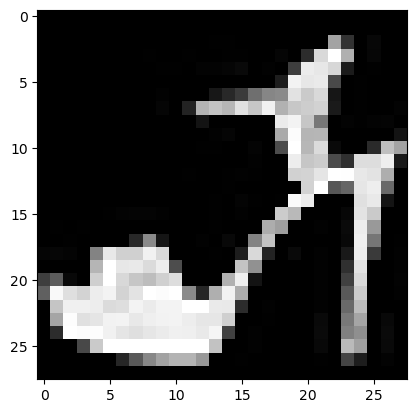

In [4]:
plt.imshow(x_train[9], cmap= 'gray')
plt.show()

In [5]:
labels= ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

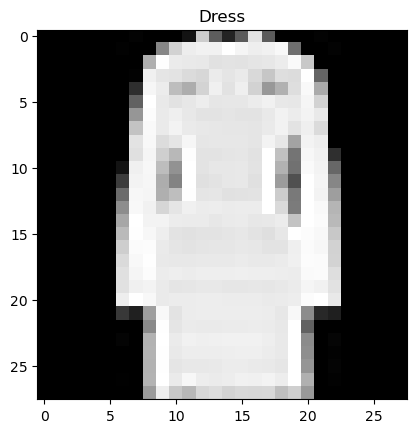

In [6]:
plt.imshow(x_train[500], cmap= 'gray')
plt.title(labels[y_train[500]])
plt.show()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
x_train_nor= x_train/255

In [9]:
x_test_nor= x_test/255

In [10]:
y_train_ohe= to_categorical(y_train)
y_test_ohe= to_categorical(y_test)

In [209]:
x_train_reshape= x_train_nor.reshape(60000,784)
x_test_reshape= x_test_nor.reshape(10000,784)

In [210]:
print(x_train_reshape.shape)
print(y_train_ohe.shape)
print(x_test_reshape.shape)
print(y_test_ohe.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import L1L2
from keras.optimizers import SGD

In [224]:
model= Sequential()
model.add(Dense(units= 80, activation= 'relu'))
model.add(Dropout(0.08))
model.add(Dense(units= 80, activation= 'relu'))
model.add(Dropout(0.08))
model.add(Dense(units= 80, activation= 'relu'))
model.add(Dropout(0.08))
model.add(Dense(units= 80, activation= 'relu'))
model.add(Dropout(0.08))
model.add(Dense(units= 80, activation= 'relu'))
model.add(Dropout(0.08))
#model.add(Dense(units= 40, activation= 'relu'))
#model.add(Dropout(0.04))
model.add(Dense(units= 10, activation= 'softmax'))

In [225]:
model.compile(optimizer= SGD(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [227]:
model.fit(x_train_reshape, y_train_ohe, epochs= 50, validation_data= (x_test_reshape, y_test_ohe), batch_size= 25)

Epoch 1/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8686 - loss: 0.3737 - val_accuracy: 0.8640 - val_loss: 0.3771
Epoch 2/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8676 - loss: 0.3770 - val_accuracy: 0.8625 - val_loss: 0.3754
Epoch 3/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8711 - loss: 0.3638 - val_accuracy: 0.8639 - val_loss: 0.3766
Epoch 4/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8725 - loss: 0.3643 - val_accuracy: 0.8639 - val_loss: 0.3755
Epoch 5/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8729 - loss: 0.3658 - val_accuracy: 0.8637 - val_loss: 0.3746
Epoch 6/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8763 - loss: 0.3557 - val_accuracy: 0.8668 - val_loss: 0.3709
Epoch 7/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8738 - loss: 0.3594 - val_accuracy: 0.8675 - val_loss: 0.3692
Epoch 8/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8747 - loss: 0.

2400/2400 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8923 - loss: 0.2994 - val_accuracy: 0.8764 - val_loss: 0.3489


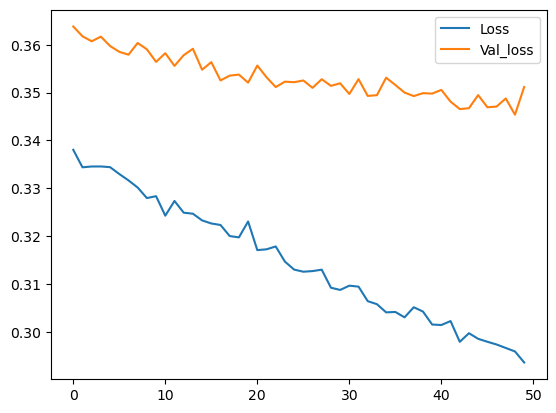

In [222]:
history= model.history.history
plt.plot(history['loss'], label= 'Loss')
plt.plot(history['val_loss'], label= 'Val_loss')
plt.legend(loc= 'best')
plt.show()

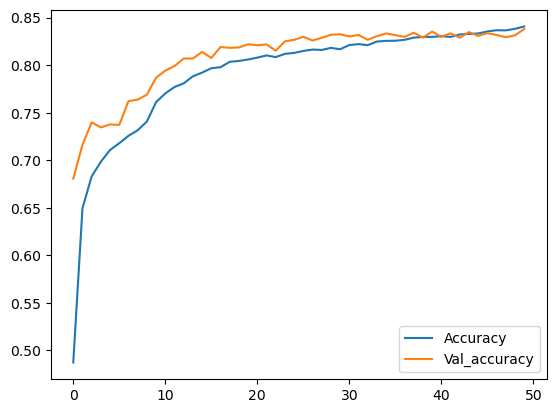

In [175]:
plt.plot(history['accuracy'], label= 'Accuracy')
plt.plot(history['val_accuracy'], label= 'Val_accuracy')
plt.legend(loc= 'best')
plt.show()

In [230]:
pred= model.predict(x_train_reshape)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [236]:
print(pred[88])
print(np.argmax(pred[88]))

[1.5009416e-09 7.8326110e-08 4.2014857e-11 2.8563477e-10 3.7089050e-09
 3.5825724e-05 1.4958025e-10 1.7786829e-04 1.9704585e-08 9.9978620e-01]
9
